# Awear Wrist Data Processing Notebook 

In [1]:
import numpy as np
import pandas as pd
from math import sqrt,acos,degrees
import matplotlib.pyplot as plt
import csv

In [5]:
path = 'Fazil/Fazil_test1'
file = 'Bulb Experiment.csv'

labels = ['Frame','Sub Frame',
          'RSHO_X','RSHO_Y','RSHO_Z',
          'RUPA_X','RUPA_Y','RUPA_Z',
          'RELB_X','RELB_Y','RELB_Z',
          'RM1_X','RM1_Y','RM1_Z',
         'RFRM_X','RFRM_Y','RFRM_Z',
         'WRM2_X','WRM2_Y','WRM2_Z',
         'RWRA_X','RWRA_Y','RWRA_Z',
         'RWRB_X','RWRB_Y','RWRB_Z',
         'RFIN_X','RFIN_Y','RFIN_Z']

In [6]:
def format_csv(path,file):
    with open(path+'/'+file, "r") as f:
        lines = f.readlines()
    with open(path+'/'+'formated_csv/'+file, "w") as f:
        for line in lines[5:]:
            f.write(line)
    with open(path+'/'+'formated_csv/'+file,newline='') as f:
        r = csv.reader(f)
        data = [line for line in r]
    with open(path+'/'+'formated_csv/'+file,'w',newline='') as f:
        w = csv.writer(f)
        w.writerow(labels)
        w.writerows(data)
    df = pd.read_csv(path+'/'+'formated_csv/'+file)
    return(df)

In [7]:
df = format_csv(path,file)
df

,Frame,Sub Frame,RSHO_X,RSHO_Y,RSHO_Z,RUPA_X,RUPA_Y,RUPA_Z,RELB_X,RELB_Y,...,WRM2_Z,RWRA_X,RWRA_Y,RWRA_Z,RWRB_X,RWRB_Y,RWRB_Z,RFIN_X,RFIN_Y,RFIN_Z
0,1,0,92.8795,-1443.67,1583.57,220.211,-1501.35,1554.73,355.850,-1526.28,...,1588.78,673.766,-1408.06,1580.56,674.614,-1469.22,1581.97,769.250,-1434.92,1605.34
1,2,0,92.8432,-1443.64,1583.58,219.999,-1501.22,1554.72,355.862,-1526.18,...,1588.95,673.751,-1408.00,1580.66,674.563,-1469.17,1582.16,769.194,-1434.90,1605.55
2,3,0,92.7676,-1443.60,1583.62,220.119,-1501.23,1554.89,355.856,-1526.08,...,1589.15,673.727,-1407.95,1580.75,674.521,-1469.12,1582.40,769.156,-1434.83,1605.76
3,4,0,92.7121,-1443.56,1583.69,219.931,-1501.21,1555.16,355.802,-1526.01,...,1589.36,673.707,-1407.91,1580.93,674.563,-1469.02,1582.73,769.099,-1434.80,1606.00
4,5,0,92.6554,-1443.52,1583.72,220.037,-1501.09,1555.07,355.776,-1525.93,...,1589.53,673.681,-1407.89,1581.10,674.523,-1469.00,1582.95,769.068,-1434.76,1606.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,4596,0,95.0164,-1413.59,1586.04,218.879,-1466.38,1583.19,359.974,-1495.12,...,1625.66,674.849,-1359.17,1612.33,677.640,-1418.36,1625.04,773.643,-1378.96,1637.41
4596,4597,0,94.9384,-1413.63,1586.05,218.942,-1466.72,1583.32,359.958,-1495.15,...,1625.74,674.776,-1359.19,1612.40,677.553,-1418.38,1625.12,773.561,-1378.97,1637.53
4597,4598,0,94.9056,-1413.65,1586.09,218.781,-1466.44,1583.29,359.904,-1495.17,...,1625.77,674.695,-1359.21,1612.41,677.504,-1418.40,1625.17,773.491,-1378.98,1637.62
4598,4599,0,94.8781,-1413.64,1586.09,218.643,-1466.16,1583.29,359.844,-1495.19,...,1625.81,674.664,-1359.23,1612.45,677.466,-1418.42,1625.23,773.451,-1378.99,1637.70


## Geometric Functions

In [8]:
def reset_origin(Main, Origin):
    Main = np.array(Main)
    Origin = np.array(Origin)
    Main_x,Main_y,Main_z = Main[:,0], Main[:,1], Main[:,2]
    o_x,o_y,o_z = Origin[:,0], Origin[:,1], Origin[:,2]
    Main_x = Main_x - o_x
    Main_y = Main_y - o_y
    Main_z = Main_z - o_z
    coor = []
    for i in range(len(Main_x)):
        coor.append([Main_x[i],Main_y[i],Main_z[i]])
    return np.array(coor)
def centroids(Points1,Points2,Points3):
    Points1 = np.array(Points1)
    Points2 = np.array(Points2)
    Points3 = np.array(Points3)
    x1,y1,z1 = Points1[:,0], Points1[:,1], Points1[:,2]
    x2,y2,z2 = Points2[:,0], Points2[:,1], Points2[:,2]
    x3,y3,z3 = Points3[:,0], Points3[:,1], Points3[:,2]
    cx = (x1+x2+x3)/3
    cy = (y1+y2+y3)/3
    cz = (z1+z2+z3)/3
    cents = []
    for i in range(len(cx)):
        cents.append([cx[i],cy[i],cz[i]])
    return np.array(cents)

# https://web.ma.utexas.edu/users/m408m/Display12-5-4.shtml
def planes(Q,R,S):
    Q,R,S = np.array(Q), np.array(R), np.array(S)
    QR = R - Q
    QS = S - Q
    x1 = QR[:,0]
    y1 = QR[:,1]
    z1 = QR[:,2]
    x2 = QS[:,0]
    y2 = QS[:,1]
    z2 = QS[:,2]
    i = y1*z2 - y2*z1
    j = x1*z2 - x2*z1
    k = x1*y2 - x2*y1
    planes = []
    for t in range(len(i)):
        planes.append([i[t],j[t],k[t]])
    return np.array(planes)

In [9]:
def angles_lines(p1,p2,mid,deg=False):
    u = np.array(p1)-np.array(mid)
    v = np.array(p2)-np.array(mid)
    i1,j1,k1 = u[:,0],u[:,1],u[:,2]
    i2,j2,k2 = v[:,0],v[:,1],v[:,2]
    angles = []
    for t in range(len(i1)):
        cos_t = abs(i1[t]*i2[t]+j1[t]*j2[t]+k1[t]*k2[t])
        cos_t = cos_t/(sqrt(i1[t]**2+j1[t]**2+k1[t]**2)*sqrt(i2[t]**2+j2[t]**2+k2[t]**2))
        if deg==False:
            angles.append(acos(cos_t))  
        if deg==True:
            angles.append(degrees(acos(cos_t)))
    return np.array(angles)

## Flexion Angles

Rotation between Planes **Palm = (RFIN,RWRB,RWRA)** and **Wrist = (WRM2,RWRA,RWRB)**
- Flexion Angle = Angle formed by three points **(RFIN,MID,WRM2)** 
- **MID** is the mid point of the segment **(RWRA,RWRB)**

In [7]:
# Wrist Segment
WRM2 = df[['WRM2_X','WRM2_Y','WRM2_Z']]
RWRA = df[['RWRA_X','RWRA_Y','RWRA_Z']]
RWRB = df[['RWRB_X','RWRB_Y','RWRB_Z']]
wrist_palnes = planes(WRM2,RWRA,RWRB)
wrist_centroids = centroids(WRM2,RWRA,RWRB)

In [8]:
# Palm Segment
RFIN = df[['RFIN_X','RFIN_Y','RFIN_Z']]
RWRA = df[['RWRA_X','RWRA_Y','RWRA_Z']]
RWRB = df[['RWRB_X','RWRB_Y','RWRB_Z']]
palm_planes = planes(RFIN,RWRA,RWRB)

In [9]:
# Bisector Point
MID = (np.array(RWRB) + np.array(RWRA))/2

In [10]:
flexion_angles = angles_lines(RFIN,WRM2,MID,deg=True)

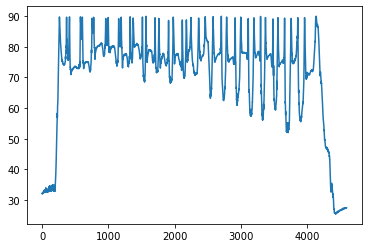

In [11]:
plt.plot(flexion_angles)

## Radial Angles
Rotation between Planes **Palm = (RFIN,RWRB,RWRA)** and **Wrist = (WRM2,RWRA,RWRB)**
- Radial Angle = Angle formed between the **Segment(RFIN,MID)** and **Segment(RWRA,RWRB)** [Offset by pi/2]
- **MID** is the mid point of the segment **(RWRA,RWRB)**

In [12]:
radial_angles = angles_lines(RFIN,RWRB,MID,deg=True)-90

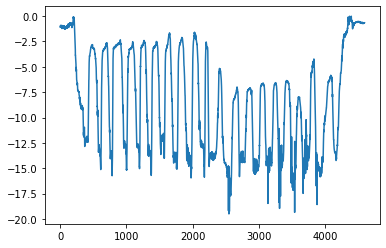

In [13]:
plt.plot(radial_angles)

## Pronation_angles
Rotation angle between Planes **Elbow = (RFRM,RM1,RELB)** and **Wrist = (WRM2,RWRA,RWRB)** through axis formed by **segment(RELB,WRM2)** on Elbow plane.

In [14]:
# Elbow Segment
RFRM = df[['RFRM_X','RFRM_Y','RFRM_Z']]
RM1 = df[['RM1_X','RM1_Y','RM1_Z']]
RELB = df[['RELB_X','RELB_Y','RELB_Z']]

In [22]:
MIDE = (np.array(RFRM) + np.array(RM1))/2
RWRA_E = RWRA - MIDE
RWRB_E = RWRB - MIDE

In [43]:
pronation_angles = angles_lines(RFRM,RWRB_E,MIDE,deg=True)

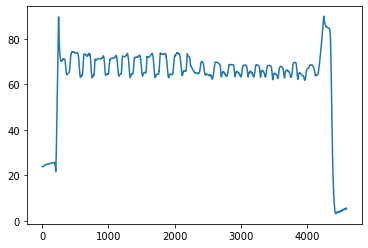

In [44]:
plt.plot(pronation_angles)

## Cumilative Function

In [10]:
def compute_wrist_angles(path,file,degree=False,save_file=True):
    df = format_csv(path,file)
    # Wrist Segment
    WRM2 = df[['WRM2_X','WRM2_Y','WRM2_Z']]
    RWRA = df[['RWRA_X','RWRA_Y','RWRA_Z']]
    RWRB = df[['RWRB_X','RWRB_Y','RWRB_Z']]
    # Palm Segment
    RFIN = df[['RFIN_X','RFIN_Y','RFIN_Z']]

    # Elbow Segment
    RFRM = df[['RFRM_X','RFRM_Y','RFRM_Z']]
    RM1 = df[['RM1_X','RM1_Y','RM1_Z']]
    RELB = df[['RELB_X','RELB_Y','RELB_Z']]
    # Shoulder Segment
    RSHO = df[['RSHO_X','RSHO_Y','RSHO_Z']]
    RUPA = df[['RUPA_X','RUPA_Y','RUPA_Z']]
    # Bisector Point
    MID = (np.array(RWRB) + np.array(RWRA))/2
    MIDE = (np.array(RFRM) + np.array(RM1))/2

    # Translate Wrist to Elbow Segment Mid
    RWRB_E = RWRB - MIDE

    flexion_angles = angles_lines(RFIN,WRM2,MID,deg=degree)
    radial_angles = angles_lines(RFIN,RWRB,MID,deg=degree)-90
    pronation_angles = angles_lines(RFRM,RWRB_E,MIDE,deg=degree)
    elbow_angles = angles_lines(RSHO,MID,MIDE,deg=degree)
    
    df_labels = ['Flexion_Angle','Radial_Angle','Pronation_Angle','Elbow_Joint']
#     df_labels = ['Pitch','Yaw','Roll']
    ndf = pd.DataFrame(columns=df_labels)
    ndf['Flexion_Angle'] = flexion_angles
    ndf['Radial_Angle'] = radial_angles
    ndf['Pronation_Angle'] = pronation_angles
    ndf['Elbow_Joint'] = elbow_angles
    
    if save_file == True:
        ndf.to_csv(path+'/'+'wrist_angles_'+file,index_label='frame')
    return ndf

In [23]:
path = 'Fazil/Fazil_test1'
file = 'Hammer Experiment01.csv'
wrist_angles_df = compute_wrist_angles(path,file,True)

<AxesSubplot:title={'center':'Flexion_Angle (Pitch)'}, xlabel='t [100hz]', ylabel='Angle (deg)'>

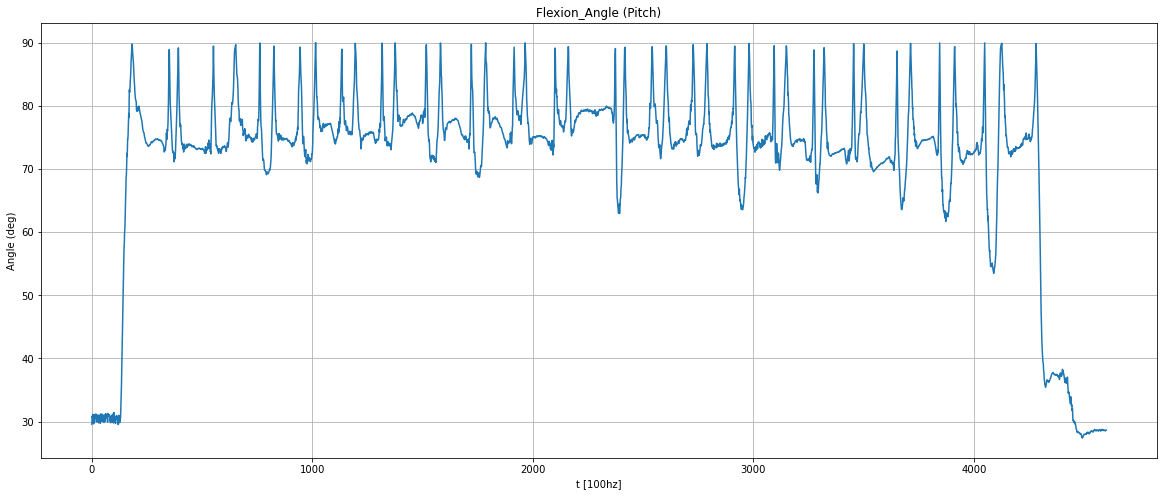

In [18]:
wrist_angles_df['Flexion_Angle'].plot(figsize=(20,8),grid=True,title='Flexion_Angle (Pitch)',ylabel='Angle (deg)',xlabel='t [100hz]')

<AxesSubplot:title={'center':'Radial_Angle (Yaw)'}, xlabel='t [100hz]', ylabel='Angle (deg)'>

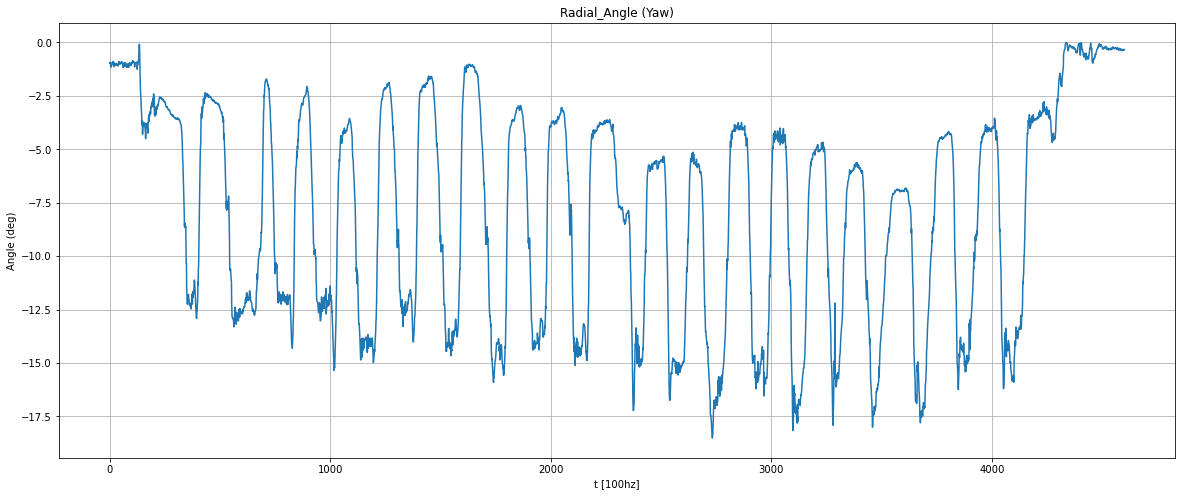

In [19]:
wrist_angles_df['Radial_Angle'].plot(figsize=(20,8),grid=True,title='Radial_Angle (Yaw)',ylabel='Angle (deg)',xlabel='t [100hz]')

<AxesSubplot:title={'center':'Pronation_Angle (Roll)'}, xlabel='t [100hz]', ylabel='Angle (deg)'>

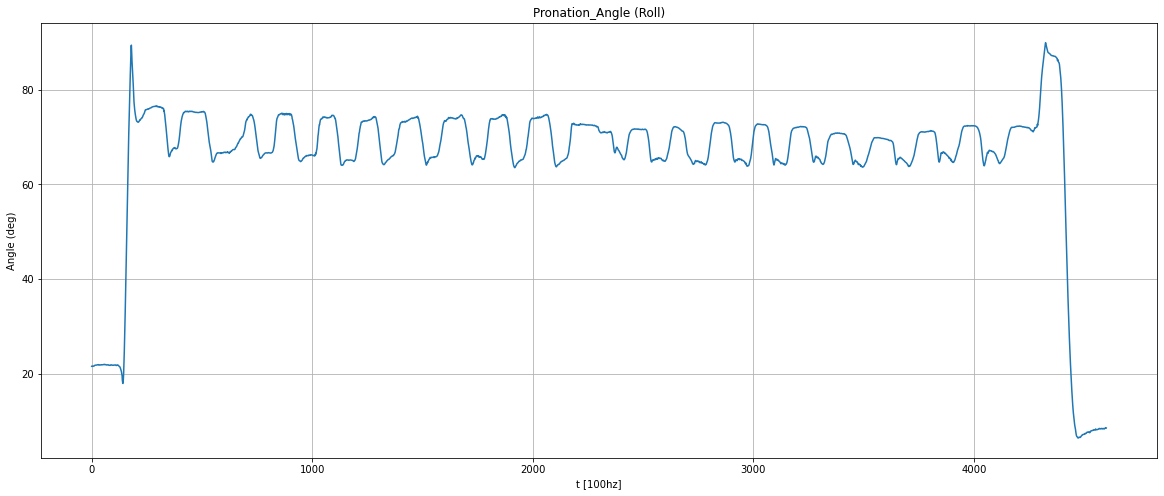

In [20]:
wrist_angles_df['Pronation_Angle'].plot(figsize=(20,8),grid=True,title='Pronation_Angle (Roll)',ylabel='Angle (deg)',xlabel='t [100hz]')

<AxesSubplot:title={'center':'Elbow_Joint Angle'}, xlabel='t [100hz]', ylabel='Angle (deg)'>

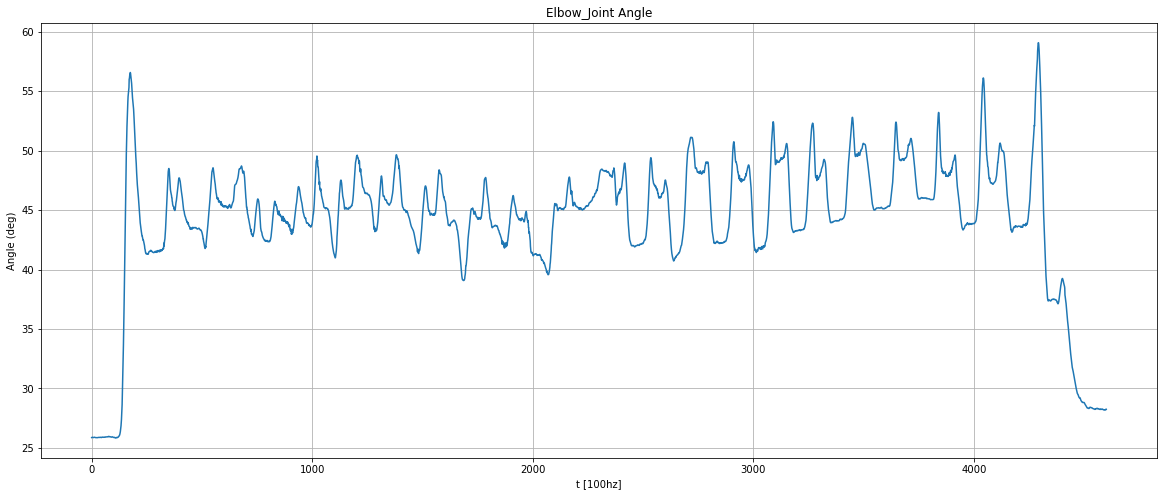

In [21]:
wrist_angles_df['Elbow_Joint'].plot(figsize=(20,8),grid=True,title='Elbow_Joint Angle',ylabel='Angle (deg)',xlabel='t [100hz]')